# Projet 2 - 02 : EDA Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})

pd.set_option('display.float_format', lambda x: f'{x}.3f')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
sns.set()

## Data visualization

In [2]:
data = pd.read_csv('cleaned_data.csv', sep='\t', low_memory=False)
print("{} rows / {} columns".format(data.shape[0], data.shape[1]))
data.head()

181861 rows / 30 columns


,code,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_fr,labels_fr,countries_fr,ingredients_text,serving_size,serving_quantity,additives_n,additives_fr,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_fr,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_100g
0,0000000001281,2018-02-05 11:40:01,2018-05-23 10:19:54,tarte noix de coco,NaN,"crous resto',crous","tartes,tartes sucrées,tartes à la noix de coco",NaN,france,NaN,NaN,56.000,1.000,NaN,d,NaN,sugary snacks,biscuits and cakes,tartes à la noix de coco,381.000,1594.000,22.000,15.500,27.300,21.900,4.400,4.600,0.100,0.040,14.000
1,0000000001885,2017-11-20 12:18:57,2018-02-08 21:48:11,compote de poire,NaN,crous,"aliments et boissons à base de végétaux,alimen...",NaN,france,NaN,NaN,56.000,1.000,NaN,a,NaN,fruits and vegetables,fruits,compotes de poire,157.000,657.000,0.000,0.000,36.000,27.000,3.600,0.600,0.000,0.000,-2.000
2,0000000005470,2017-11-27 10:34:20,2019-02-14 21:41:58,baguette bressan,1,crousresto',"aliments et boissons à base de végétaux,alimen...",NaN,france,"bâguette bressan pain baguette 46,2%,' farine ...",NaN,56.000,3.000,"e14xx - amidons modifiés,e262 - acétates de so...",a,4.000,cereals and potatoes,bread,baguettes,160.000,669.000,2.200,0.500,25.200,0.600,1.600,9.500,0.358,0.143,-4.000
3,0000001938067,2017-01-15 17:32:08,2018-12-30 17:08:34,chaussons tressés aux pommes,1.200 kg,kirkland signature,"snacks,snacks sucrés,biscuits et gâteaux,vienn...",NaN,canada,"pâte (farine, margarines d'huile de palme et d...",150 g / 1 chausson,150.000,3.000,"e202 - sorbate de potassium,e211 - benzoate de...",c,4.000,sugary-snacks,pastries,chaussons aux pommes,260.000,1090.000,10.700,2.000,38.700,24.700,2.000,3.330,0.647,0.259,9.000
4,0000004302544,2017-03-02 14:28:16,2017-03-02 14:41:27,pain burger artisan,1.008 kg / 12 pain,kirkland signature,boulange,NaN,canada,"ingrédients : farine, eau, sel, levure, orge m...",90 g / 1 pain,90.000,0.000,NaN,b,3.000,unknown,unknown,boulange,278.000,1160.000,1.110,0.333,53.300,1.110,2.220,10.000,1.520,0.610,2.000


In [3]:
data.set_index('code', inplace=True)

In [4]:
data.dtypes

created_datetime           object
last_modified_datetime     object
product_name               object
quantity                   object
brands                     object
categories_fr              object
labels_fr                  object
countries_fr               object
ingredients_text           object
serving_size               object
serving_quantity          float64
additives_n               float64
additives_fr               object
nutriscore_grade           object
nova_group                float64
pnns_groups_1              object
pnns_groups_2              object
main_category_fr           object
energy_kcal_100g          float64
energy_100g               float64
fat_100g                  float64
saturated_fat_100g        float64
carbohydrates_100g        float64
sugars_100g               float64
fiber_100g                float64
proteins_100g             float64
salt_100g                 float64
sodium_100g               float64
nutrition_score_100g      float64
dtype: object

In [5]:
data['main_category_fr'].dropna().unique().shape[0]

7636

In [6]:
# parsing datetime
data['created_datetime'] = pd.to_datetime(data['created_datetime'], errors='coerce')
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], errors='coerce')

In [7]:
# nova_group = categorical variable
data['nova_group'] = data['nova_group'].astype(str)

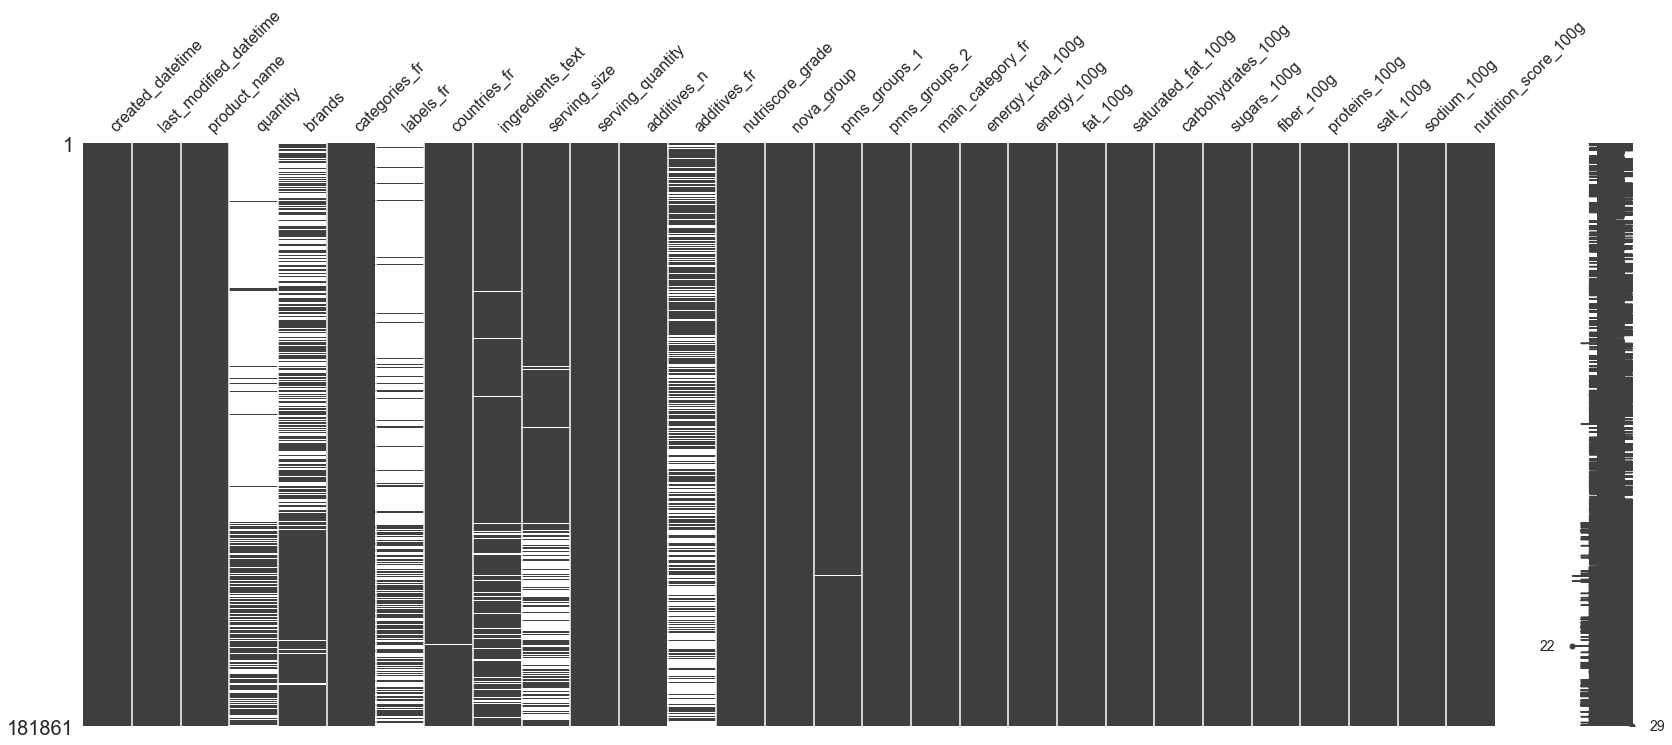

In [8]:
msno.matrix(data)

### Numeric features distributions

In [9]:
data.describe()

,serving_quantity,additives_n,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_100g
count,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000,181861.000
mean,69.019,1.611,243.560,1018.306,9.923,3.013,31.772,11.070,2.209,6.754,0.779,0.312,6.483
std,44.603,1.888,166.129,694.899,11.331,4.092,26.694,13.498,2.257,5.725,0.740,0.296,8.687
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-15.000
25%,33.000,0.000,89.000,369.000,0.700,0.000,7.600,1.410,0.000,2.000,0.100,0.040,-1.000
50%,56.000,1.000,226.000,946.000,5.000,1.000,22.500,4.500,1.700,5.880,0.640,0.256,5.000
75%,95.000,3.000,379.000,1586.000,16.670,4.640,56.760,16.810,3.600,10.000,1.210,0.484,13.000
max,227.100,7.000,868.000,3632.000,51.000,16.670,100.000,53.400,9.000,23.800,3.067,1.227,36.000


In [ ]:
data.hist(figsize=(35,10), layout=(3,5))
plt.show()

## Univariate analyzes

In this section I will independently look at each variable that I find important to realize my application.  
I will especially dissociate the lists contained in some columns in order to locate the most frequent elements

### Most common additives

Proportion of foods with additives

In [ ]:
contains_additives = data[data['additives_n'] > 0]
no_additives = data[data['additives_n'] == 0]

labels = 'Contains Additives', 'No Additives'
sizes = [len(contains_additives), len(no_additives)]
plt.pie(sizes, explode=(0.1, 0), labels=labels, colors=['lightcoral', 'lightskyblue'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
# Split additives lists
exp_additives = data['additives_fr'].str.split(',').apply(Series, 1).stack()
exp_additives.index = exp_additives.index.droplevel(-1)
exp_additives.name = 'additives_exp'
# create new df with a row for each additives
data_exp_additives = data.join(exp_additives)
print('{:,} unique additives'.format(len(data_exp_additives['additives_exp'].value_counts())))

In [ ]:
additives_top_10 = data_exp_additives['additives_exp'].value_counts().head(10).sort_values()
additives_top_10.plot(kind='barh', figsize=(12,7))
plt.xlabel('Frequency')
plt.ylabel('Additives')
plt.title('The 10 most used Additives', fontsize=16)
plt.show()

### Most common ingredients

In [ ]:
# Split ingredients lists
exp_ingredients = data['ingredients_text'].str.split(',').apply(Series, 1).stack()
exp_ingredients.index = exp_ingredients.index.droplevel(-1)
exp_ingredients.name = 'ingredients_exp'
# create new df with a row for each additives
data_exp_ingredients = data.join(exp_ingredients)
print('{:,} unique ingredients'.format(len(data_exp_ingredients['ingredients_exp'].value_counts())))

In [ ]:
ingredients_top_10 = data_exp_ingredients['ingredients_exp'].value_counts().head(10).sort_values()
ingredients_top_10.plot(kind='barh', figsize=(12,5))
plt.xlabel('Frequency')
plt.ylabel('Ingredients')
plt.title('The 10 most used Ingredients', fontsize=16)
plt.show()

### Most common categories

In [ ]:
data['main_category_fr'].dropna().unique().shape[0]

In [ ]:
# Split categories lists
exp_categories = data['categories_fr'].str.split(',').apply(Series, 1).stack()
exp_categories.index = exp_categories.index.droplevel(-1)
exp_categories.name = 'categories_exp'
data_exp_categories = data.join(exp_categories)


In [ ]:
print('{} unique categories'.format(len(data_exp_categories['categories_exp'].value_counts())))

In [ ]:
categories_top_10 = data_exp_categories['categories_exp'].value_counts().head(10).sort_values()
categories_top_10.plot(kind='barh', figsize=(12,5))
plt.xlabel('Frequency')
plt.ylabel('Categories')
plt.title('The 10 most common Categories', fontsize=16)
plt.show()

### Most common countries

In [ ]:
# Split countries lists
exp_countries = data['countries_fr'].str.split(',').apply(Series, 1).stack()
exp_countries.index = exp_countries.index.droplevel(-1)
exp_countries.name = 'countries_exp'
data_exp_countries = data.join(exp_countries)
print('{:,} unique countries'.format(data_exp_countries['countries_exp'].dropna().unique().shape[0]))

In [ ]:
# Excluding Countries that appear less then 10 times in the data
countries_filtered = data_exp_countries.groupby('countries_exp').filter(lambda x: len(x) >= 10)
print('{} unique countries'.format(len(countries_filtered['countries_exp'].value_counts())))

In [ ]:
countries_top_5 = countries_filtered['countries_exp'].value_counts().head(5).sort_values()
countries_top_5.plot(kind='barh', figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Countries')
plt.title('The 5 most common Countries', fontsize=16)
plt.show()

In [ ]:
print('Products available in France :', data_exp_countries[data_exp_countries['countries_exp']=='france'].shape[0])

## Bivariate Analyses

### Categories Analysis

In this section, I will analyze the categories of products to identify the most interesting in terms of nutritional intake.  
Then I will identify the most healthy and unhealthy

**Excluding Categories that appear less then 10 times in the data**

In [ ]:
categories_filtered = data_exp_categories.groupby('categories_exp').filter(lambda x: len(x) >= 10)
print('{} unique categories'.format(len(categories_filtered['categories_exp'].value_counts())))

In [ ]:
# We group the dataframe by their categories
categories_grouped = categories_filtered.groupby('categories_exp')
categories_grouped.describe()

#### Nutrients intake

**Fat**

In [ ]:
fat_top_ten = categories_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)
fat_top_ten

In [ ]:
index = fat_top_ten.index
mean = fat_top_ten['mean'] 
std = fat_top_ten['std']

plt.figure(figsize=(7,7))
x_pos = [i for i, _ in enumerate(index)]
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Mean Fat Content per 100g", fontsize=14)
plt.title("Categories with the highest average Fat Content / 100g", fontsize=16)
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

**Proteins**

In [ ]:
protein_top_ten = categories_grouped['proteins_100g'].describe().sort_values(by='mean',ascending=False).head(10)
protein_top_ten

In [ ]:
index = protein_top_ten.index
mean = protein_top_ten['mean'] 
std = protein_top_ten['std']

plt.figure(figsize=(7,7))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(12,7)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Mean Protein Content per 100g", fontsize=14)
plt.title("Categories with the highest average Protein Content / 100g", fontsize=16)
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

**Carbohydrates**

In [ ]:
carbs_top_ten = categories_grouped['carbohydrates_100g'].describe().sort_values(by='mean',ascending=False).head(10)
carbs_top_ten

In [ ]:
index = carbs_top_ten.index
mean = carbs_top_ten['mean'] 
std = carbs_top_ten['std']

plt.figure(figsize=(7,7))
x_pos = [i for i, _ in enumerate(index)]
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Mean Carbohydrate Content per 100g", fontsize=14)
plt.title("Categories with the highest average Carbohydrate Content / 100g", fontsize=16)
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

**Sugar**

In [ ]:
sugar_top_10 = categories_grouped['sugars_100g'].describe().sort_values(by='mean',ascending=False).head(10)
sugar_top_10

In [ ]:
index = sugar_top_10.index
mean = sugar_top_10['mean'] 
std = sugar_top_10['std']

plt.figure(figsize=(12,7))
x_pos = [i for i, _ in enumerate(index)]
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Mean Sugar Content per 100g", fontsize=14)
plt.title("The 10 Categories with the highest average Suger Content per 100g", fontsize=16)
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")
plt.show()

#### Healthiest / Unhealthiest Categories

In [ ]:
healthy_top_10 = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True).head(10)
healthy_top_10

In [ ]:
index = healthy_top_10.index
mean = healthy_top_10['mean'] 
std = healthy_top_10['std']

plt.figure(figsize=(7,5))
x_pos = [i for i, _ in enumerate(index)]
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Mean Nutrition Score per 100g", fontsize=14)
plt.title("The 10 Healthiest Categories", fontsize=16)
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")
plt.gca().invert_yaxis()

plt.show()

In [ ]:
un_healthy_top_10 = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=False).head(10)
un_healthy_top_10

In [ ]:
index = un_healthy_top_10.index
mean = un_healthy_top_10['mean'] 
std = un_healthy_top_10['std']

plt.figure(figsize=(7,5))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Mean Nutrition Score per 100g", fontsize=14)
plt.title("The 10 unhealthiest Categories", fontsize=16)
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

### Nutrition Score Analysis

In this section I will use the most common categorical values that I have identified previously to analyze the nutrition score.  
(I use the most common values to be sure I have enough data to be representative)  
Then I will do the comparison with the numeric variables

#### Nutition score by most common additives

In [ ]:
additives_top_10.index[::-1]

In [ ]:
additives_filtered = data_exp_additives[(data_exp_additives['additives_exp']=='e330 - acide citrique')|
                                        (data_exp_additives['additives_exp']=='e322 - lécithines')|
                                        (data_exp_additives['additives_exp']=='e322i - lécithine')|
                                        (data_exp_additives['additives_exp']=='e500 - carbonates de sodium')|
                                        (data_exp_additives['additives_exp']=='e500ii - carbonate acide de sodium')|
                                        (data_exp_additives['additives_exp']=='e415 - gomme xanthane')|
                                        (data_exp_additives['additives_exp']=='e412 - gomme de guar')|
                                        (data_exp_additives['additives_exp']=='e407 - carraghénanes')|
                                        (data_exp_additives['additives_exp']=='e202 - sorbate de potassium')|
                                        (data_exp_additives['additives_exp']=='e410 - gomme de caroube')]

In [ ]:
top_additives_grouped = additives_filtered.groupby('additives_exp')
top_additives_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True)

In [ ]:
del top_additives_grouped

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Nutrition score for the most common additives', fontsize=16)
sns.boxplot(x="nutrition_score_100g", y="additives_exp", 
            data=additives_filtered, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

#### Nutrition score by most common ingredients

In [ ]:
# focus on the 10 most common ingredients
ingredients_top_10.index[::-1]

In [ ]:
ingredients_filtered = data_exp_ingredients[(data_exp_ingredients['ingredients_exp']==' salt')|
                                        (data_exp_ingredients['ingredients_exp']==' sugar')|
                                        (data_exp_ingredients['ingredients_exp']==' water')|
                                        (data_exp_ingredients['ingredients_exp']==' niacin')|
                                        (data_exp_ingredients['ingredients_exp']==' citric acid')|
                                        (data_exp_ingredients['ingredients_exp']==' riboflavin')|
                                        (data_exp_ingredients['ingredients_exp']==' reduced iron')|
                                        (data_exp_ingredients['ingredients_exp']==' folic acid)')|
                                        (data_exp_ingredients['ingredients_exp']==' spices')|
                                        (data_exp_ingredients['ingredients_exp']==' dextrose')]

In [ ]:
top_ingredients_grouped = ingredients_filtered.groupby('ingredients_exp')
top_ingredients_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Nutrition score for the most common ingredients', fontsize=16)
sns.boxplot(x="nutrition_score_100g", y="ingredients_exp", 
            data=ingredients_filtered, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

#### Nutrition score by most common categories

In [ ]:
# focus on the 10 categories with the most data
categories_top_10.index[::-1]

In [ ]:
categories_filtered = data_exp_categories[(data_exp_categories['categories_exp']=='aliments et boissons à base de végétaux')|
                                     (data_exp_categories['categories_exp']=="aliments d'origine végétale")|
                                     (data_exp_categories['categories_exp']=='snacks')|
                                     (data_exp_categories['categories_exp']=='céréales et pommes de terre')|
                                     (data_exp_categories['categories_exp']=='aliments à base de fruits et de légumes')|
                                     (data_exp_categories['categories_exp']=='céréales et dérivés')|
                                     (data_exp_categories['categories_exp']=='surgelés')|
                                     (data_exp_categories['categories_exp']=='snacks sucrés')|
                                     (data_exp_categories['categories_exp']=='biscuits et gâteaux')|
                                     (data_exp_categories['categories_exp']=='epicerie')]
categories_filtered['categories_exp'].value_counts()

In [ ]:
top_categories_grouped = categories_filtered.groupby('categories_exp')
top_categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Nutrition score for the most common categories', fontsize=16)
sns.boxplot(y="categories_exp", x="nutrition_score_100g", 
            data=categories_filtered, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

#### Nutrition score by most common countries

In [ ]:
# focus on the 5 countries with the most data
countries_top_5.index[::-1]

In [ ]:
countries_filtered = countries_filtered[(countries_filtered['countries_exp']=='états-unis')|
                                        (countries_filtered['countries_exp']=='france')|
                                        (countries_filtered['countries_exp']=='espagne')|
                                        (countries_filtered['countries_exp']=='allemagne')|
                                        (countries_filtered['countries_exp']=='suisse')]
countries_filtered['countries_exp'].value_counts()

In [ ]:
top_countries_grouped = countries_filtered.groupby('countries_exp')
print(top_countries_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True))
del top_countries_grouped

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Nutrition score for the most common countries', fontsize=16)
sns.boxplot(x="countries_exp", y="nutrition_score_100g", 
            data=countries_filtered, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"},
            order=['suisse', 'allemagne', 'espagne', 'france', 'états-unis'])

#### Relationships with other num features

In [ ]:
data.select_dtypes(include=float).columns

In [ ]:
sns.pairplot(data, height=7,
             hue='nutriscore_grade', 
             y_vars=['nutrition_score_100g'], 
             x_vars= data.select_dtypes(include=float).columns)

### Energy Analysis

In this section I am interested in the columns of energy. First to compare the two dependent columns.  
Then to compare with the most common categorical values and finally with the numerical variables.

#### energy_kcal_100g & energy_100g (kJ)

In [ ]:
sns.pairplot(data, height=7,
             hue='nutriscore_grade', 
             y_vars=['energy_100g'], 
             x_vars= ['energy_kcal_100g'])

These two columns describe the same information in different units (kJ and kcal) and are therefore not independent.  
We know that 1kJ = 0.2389kcal
The data should be proportional and end up on the diagonal of the graph, however we see that the data also aligns on a second axis, closer to the kcal axis.
This means that some data has equal value in both columns and the problem may comes from the column in kJ.  
Scattered dots may reflect an error in data entry

In [ ]:
# convert value from kJ to kcal where value in kcal is 0
null_kcal_id = data[(data['energy_100g']>0) & (data['energy_kcal_100g']==0)].index
data.loc[null_kcal_id, 'energy_kcal_100g'] = data.loc[null_kcal_id, 'energy_100g'] * 0.2389 

After using the kJ values to assign a kcal value where there was 0 we can delete the column 'energy_100g'

In [ ]:
data.drop(columns='energy_100g', inplace=True)

#### Energy by most common ingredients

In [ ]:
top_ingredients_grouped['energy_100g'].describe().sort_values(by='mean',ascending=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x="energy_100g", y="ingredients_exp", 
            data=ingredients_filtered, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

#### Energy by most common categories

In [ ]:
top_categories_grouped['energy_100g'].describe().sort_values(by='mean',ascending=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(x="energy_kcal_100g", y="categories_exp", 
            data=categories_filtered, 
            ax=ax, 
            linewidth=1.5, 
            showmeans=True, 
            meanprops={"marker":"x", "markeredgecolor":"black"})

**The energy values are widely dispersed in each category, which will be useful to offer several products according to user needs.**

#### Relationships with other num features

In [ ]:
sns.pairplot(data, height=7,
             hue='nutriscore_grade', 
             y_vars=['energy_kcal_100g'], 
             x_vars= data.select_dtypes(include=float).columns)

## Correlations

In [ ]:
corr = data.corr(method = "pearson")
corr

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
# Source: https://code.i-harness.com/en/q/10f46da
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
print('The top 10 Correlations between variables are: \n{}'.format(get_top_abs_correlations(data.select_dtypes(include=float), n=10)))

## Statistical Tests

To be able to use parametric tests, my data must validate certain conditions, so I started by performing a normality test

### D'Agostino's K² Normality Test

H0: the sample has a Gaussian distribution.  
H1: the sample does not have a Gaussian distribution.

In [ ]:
from scipy.stats import normaltest
num_data = data.select_dtypes(include=float)
for col in num_data.columns:
    stat, p = normaltest(data[col])
    #print('K²=%.3f, p=%.3f' % (stat, p))
    if p > 0.01:
        print('{} : K²={:.3f}; p={:.3f} - Not reject H0 : Feature probably Gaussian\n'.format(col, stat, p))
    else:
        print('{} : K²={:.3f}; p={:.3f} - Reject H0\n'.format(col, stat, p))

**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider that the columns are not normally distributed**

These features are not normaly distributed and don't have the same variance so I'm gonna use non parametric tests

### Spearman's correlation test

Then I test the dependence between the salt and sodium columns with a Spearman's correlation test

In [ ]:
data[['salt_100g', 'sodium_100g']].describe()

In [ ]:
data[['salt_100g', 'sodium_100g']].hist(figsize=(5,3))

In [ ]:
sns.pairplot(data, height=5,
             y_vars=['salt_100g'], 
             x_vars=['sodium_100g'])

H0: the two features are independent.  
H1: there is a dependency between the features.

In [ ]:
from scipy.stats import spearmanr
stat, p = spearmanr(data['salt_100g'], data['sodium_100g'])
print('r=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Not reject H0 : Probably independent')
else:
	print('Reject H0 : Probably dependent')

**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider that 'sodium_100g' and 'salt_100g' are dependant**  

In [ ]:
# So we can drop one of these columns.
# data.drop(columns=['sodium_100g'], inplace=True)

### Chi² correlation test

Then I tested the dependence between nutrition_score_100g and nutriscore_grade

In [ ]:
# correlation ratio used in ANOVA equivalent to R²
def eta_squared(x,y):
    mean_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'mean_classe': yi_classe.mean()})
    SCT = sum([(yj-mean_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['mean_classe']-mean_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data['nutriscore_grade'], data['nutrition_score_100g'])

**As the correlation ratio eta² is close to 1 we can assume there is a high correlation between these features**

H0: the two samples are independent.  
H1: there is a dependency between the samples

In [ ]:
cont = data[['nutrition_score_100g', 'nutriscore_grade']].pivot_table(index='nutrition_score_100g', columns="nutriscore_grade", aggfunc=len).fillna(0).copy().astype(int)
cont.head(10)

In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(cont)
print('chi²=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably independent')
else:
	print('Probably dependent')

**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider that 'nutrition_score_100g' and 'nutriscore_grade' are dependant**  

### Kruskal-Wallis H Test

As I decided to accept their dependence, I then looked at the values of the nutriscore for each grade in order to check if they are indeed an aggregation of the values of the nutriscore

In [ ]:
from scipy.stats import kruskal
stat, p = kruskal(data['nutrition_score_100g'][data['nutriscore_grade']=='a'],
                   data['nutrition_score_100g'][data['nutriscore_grade']=='b'],
                   data['nutrition_score_100g'][data['nutriscore_grade']=='a'],
                   data['nutrition_score_100g'][data['nutriscore_grade']=='d'],
                   data['nutrition_score_100g'][data['nutriscore_grade']=='e'])
print('H=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider there is a statistically significant difference between the groups**

The grades are quite distinct, so I can use it as a dependency variable to predict in possible classification machine learning models

## PCA

In [ ]:
from sklearn import preprocessing
num_data = data.select_dtypes(include=float)
# feature scaling : standardisation
std_scale = preprocessing.StandardScaler().fit(num_data)
X_scaled = std_scale.transform(num_data)

In [ ]:
# Number of components to keep 
n_components = min(num_data.shape[0], num_data.shape[1])

In [ ]:
# Calcul des composantes principales
from sklearn import decomposition
pca = decomposition.PCA(n_components=n_components)
X_projected = pca.fit_transform(X_scaled)

In [ ]:
# explained variance for each component
print(pca.explained_variance_ratio_)
# total
print('{:.2f}'.format(pca.explained_variance_ratio_.sum()))

In [ ]:
# Scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(12,7))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot', fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(np.arange(0, n_components), pca.explained_variance_ratio_.cumsum())
sns.pointplot(x=ind, y=pca.explained_variance_ratio_.cumsum())
ax.set_xticks(ind)
ax.set_xticklabels(ind)
plt.title("Explained variance vs. number of components", fontsize=16)
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

We can reduce the dataset to 5 features which explain 90% of the variance of the data

### Projections on the first factorial plane

In [ ]:
# Correlation circle
pcs = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, num_data.columns[i], fontsize='14')
x_lim = 1.1
y_lim = 1.1
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC1 : {:.2f}%".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
plt.ylabel("PC2 : {:.2f}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.title('Correlation Circle', fontsize=16)
plt.show()

In [ ]:
# data projection on the first two components colored by nutrition_score_100g
plt.figure(figsize=(15,7))
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    c=data.get('nutrition_score_100g'))
x_lim = 7.5
y_lim = 6
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC1 : {:.2f}%".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
plt.ylabel("PC2 : {:.2f}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.title('Projection on the first two components, colored by nutrition_score_100g', fontsize=16)
plt.colorbar()

### Projections on the 2nd factorial plane

In [ ]:
# Correlation circle
pcs = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, num_data.columns[i], fontsize='14')

x_lim = 1.1
y_lim = 1.1
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC3 : {:.2f}%".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
plt.ylabel("PC4 : {:.2f}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.title('Correlation Circle', fontsize=16)
plt.show()

In [ ]:
# data projection on the 3th and 4th components colored by nutrition_score_100g
plt.figure(figsize=(10,7))
plt.scatter(X_projected[:, 2], X_projected[:, 3],
    c=data.get('fiber_100g'))
x_lim = 6
y_lim = 6
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC3 : {:.2f}%".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
plt.ylabel("PC4 : {:.2f}%".format(pca.explained_variance_ratio_[3]*100), fontsize=14)
plt.title('Projection on the 3th and 4th components colored by fiber_100g', fontsize=16)
plt.colorbar()